<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/car_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selling Price Prediction
Project Content

First Step: First Organization
Introduction
Loading and Checking The Dataset

Second Step: Data Preprocessing
Exploratory Data Analysis
Correlation Analysis
Dealing with Outliers
Seperating Data into Two Parts of Train and Development Datasets

Third and Final Step: Modeling
Linear Regression
Model deployment
Conclusion

Introduction
Here we want to work on a car dataset contains 301 records and 9 features. These features are:

Car_Name

This field shows the cars' names and has a different variation of car models. It doesn't seem to be helpful in our project. But we have to check out its values to be sure if we don't want to use this field in our model.

Year

The older the vehicle, the chepaer the price! We can assume this hypothesis but what if a car was a kind of antiquate. We don't know and have to check these ideas.

Selling_Price

In the end it seems that we want to predict the selling price of a car with an eclectic set of features. We will discuss more about this later on the project.

Present_Price

I don't know but I guess the price of a used vehicle to sell highly depends on its new one's selling price. But wait to check this hypothesis statistically,

Kms_Driven

humm... The older the car, we can assume it has been used more. What to do now? It seems both the features year and kms driven are telling us the same thing.

Fuel_Type

I have no idea about how the fuel type change the price of a car. We'll discuss about this issue later.

Seller_Type

I think dealer can sell a car in a higher price. If not, what's the reason to be a diller? :)

Transmission

How does the transmission type can determine the selling price? No idea.

Owner

And the last field is the owner feature and we have no information about this field. I presume this field tells us about how many owners a car has had till now? Am I right?

Let's import necessary libraries

In [ ]:
!pip install pyodbc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

In [ ]:
df=pd.read_excel('car data.xlsx')
df.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00


For simple data preprocessing explanatory
I import datasist library

In [ ]:
!pip install datasist
import datasist as ds

In [ ]:
ds.structdata.describe

<function datasist.structdata.describe(data=None, name='', date_cols=None, show_categories=False, plot_missing=False)>

In [ ]:
ds.structdata.describe(df)

First five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00




Random five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
76060,corolla,2004,10929.35,135871,Petrol,Dealer,Automatic,0,10218.50
51074,verna,2013,10391.40,47182,Diesel,Dealer,Manual,0,9688.15
7876,corolla altis,2011,8366.74,88153,Petrol,Dealer,Manual,0,7657.35
4113,i20,2016,11010.60,17803,Petrol,Dealer,Manual,0,10308.25
68548,Bajaj Pulsar NS 200,2014,9661.99,26461,Petrol,Individual,Manual,0,8961.60




Last five data points


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
99995,ertiga,2015,11994.71,27787,Petrol,Dealer,Manual,0,11293.10
99996,corolla altis,2017,11725.64,10207,Petrol,Dealer,Manual,0,11024.00
99997,verna,2013,9601.40,46392,Diesel,Dealer,Manual,0,8898.15
99998,KTM RC200,2017,10846.78,4645,Petrol,Individual,Manual,0,10146.65
99999,i10,2012,9464.60,37035,Petrol,Dealer,Manual,0,8763.10




Shape of  data set: (100000, 9)


Size of  data set: 900000


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Car_Name,object
Year,int64
Present_Price,float64
Kms_Driven,int64
Fuel_Type,object
Seller_Type,object
Transmission,object
Owner,int64
Selling_Price,float64




Numerical Features in Data set
['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Selling_Price']


Categorical Features in Data set


['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']



Statistical Description of Columns


,Year,Present_Price,Kms_Driven,Owner,Selling_Price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2014.059300,10454.815579,35544.731010,0.036080,9752.087633
std,2.592811,1497.176036,35908.164469,0.213913,1498.468367
min,2003.000000,3405.280000,606.000000,0.000000,2703.350000
25%,2013.000000,9406.007500,15760.000000,0.000000,8703.250000
50%,2015.000000,10628.705000,30595.500000,0.000000,9926.700000
75%,2016.000000,11639.782500,46476.000000,0.000000,10938.120000
max,2018.000000,12731.230000,502479.000000,3.000000,12028.000000




Description of Categorical Features


,count,unique,top,freq
Car_Name,100000,98,city,8919
Fuel_Type,100000,3,Petrol,78995
Seller_Type,100000,2,Dealer,65615
Transmission,100000,2,Manual,86541




Unique class Count of Categorical features


,Feature,Unique Count
0,Car_Name,98
1,Fuel_Type,3
2,Seller_Type,2
3,Transmission,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Car_Name,0,0.0
1,Year,0,0.0
2,Present_Price,0,0.0
3,Kms_Driven,0,0.0
4,Fuel_Type,0,0.0
5,Seller_Type,0,0.0
6,Transmission,0,0.0
7,Owner,0,0.0
8,Selling_Price,0,0.0


Unique Values in Car_Name is too large to plot




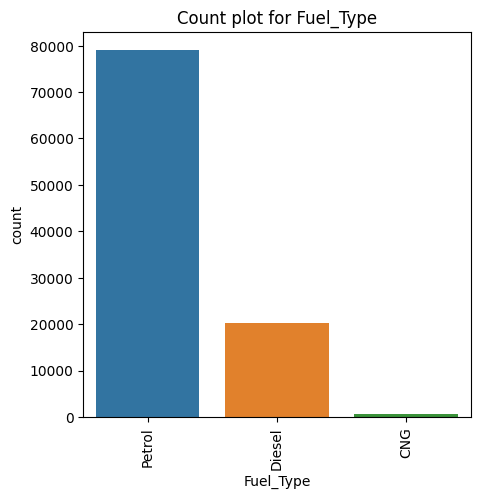

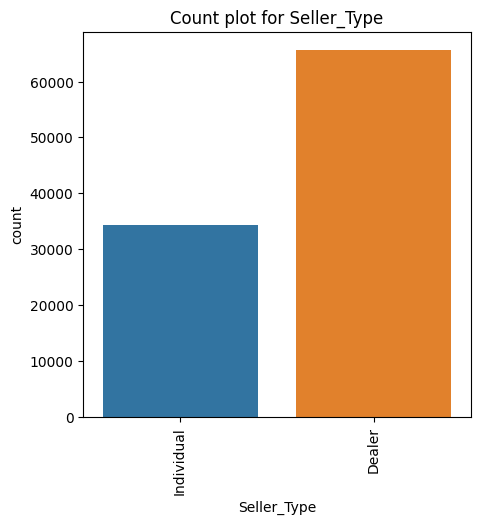

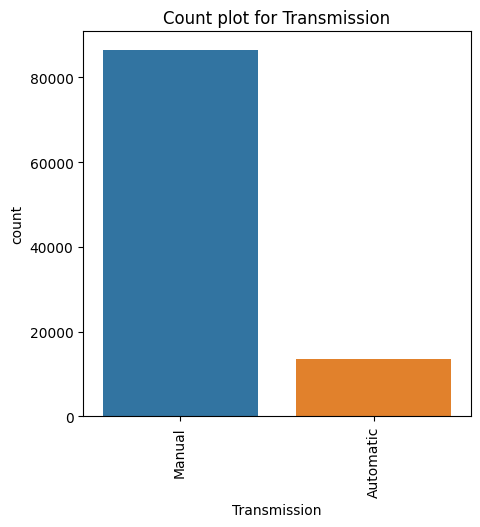

In [ ]:

ds.visualizations.countplot(df)

In [ ]:
df.columns

Unique Values in Car_Name is too large to plot




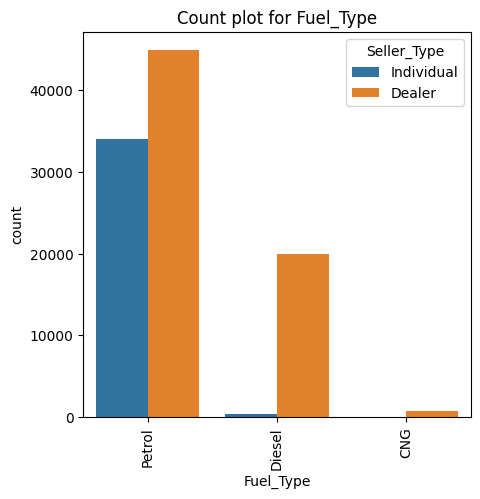

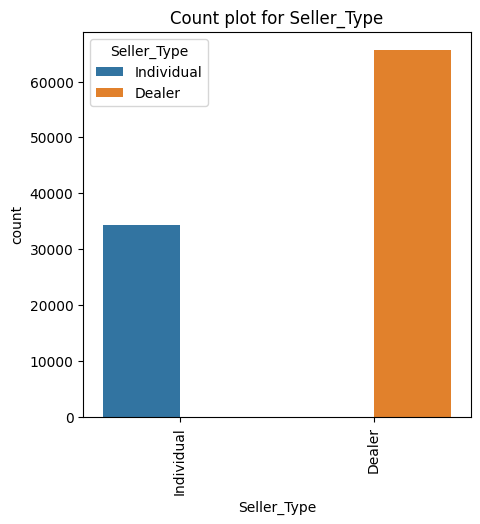

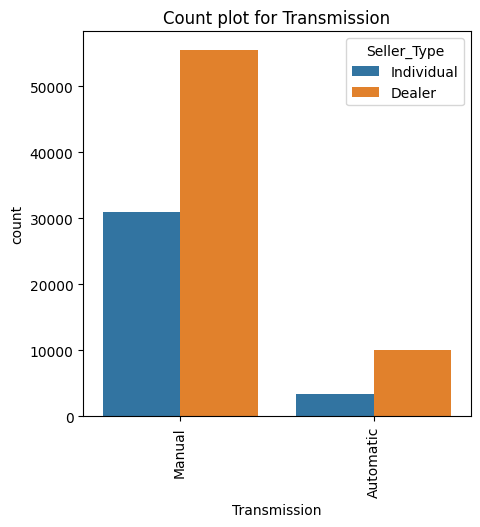

In [ ]:


ds.visualizations.countplot(df,separate_by='Seller_Type')

In [ ]:
df1=ds.feature_engineering.fill_missing_cats(df)
df1=ds.feature_engineering.fill_missing_num(df)

In [ ]:
df1.head()

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,Hero Passion X pro,2016,12417.55,33217,Petrol,Individual,Manual,0,11717.50
1,xcent,2017,10633.13,12905,Petrol,Dealer,Manual,0,9931.75
2,verna,2015,10881.40,62053,Diesel,Dealer,Manual,0,10180.25
3,ertiga,2016,11107.79,43897,Diesel,Dealer,Manual,0,10404.75
4,jazz,2016,10316.40,4108,Petrol,Dealer,Manual,0,9614.00


Since the machine doesn't understand categorical variables, I changed categorical variables to numerical variables by calling the dummies function

In [ ]:
df1=pd.get_dummies(df1,drop_first=True)
df1.head()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2016,12417.55,33217,0,11717.50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2017,10633.13,12905,0,9931.75,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,2015,10881.40,62053,0,10180.25,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2016,11107.79,43897,0,10404.75,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2016,10316.40,4108,0,9614.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


I now check features importance to know Which columns are important to the selling price

<ipython-input-12-2f92b00fe2f8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

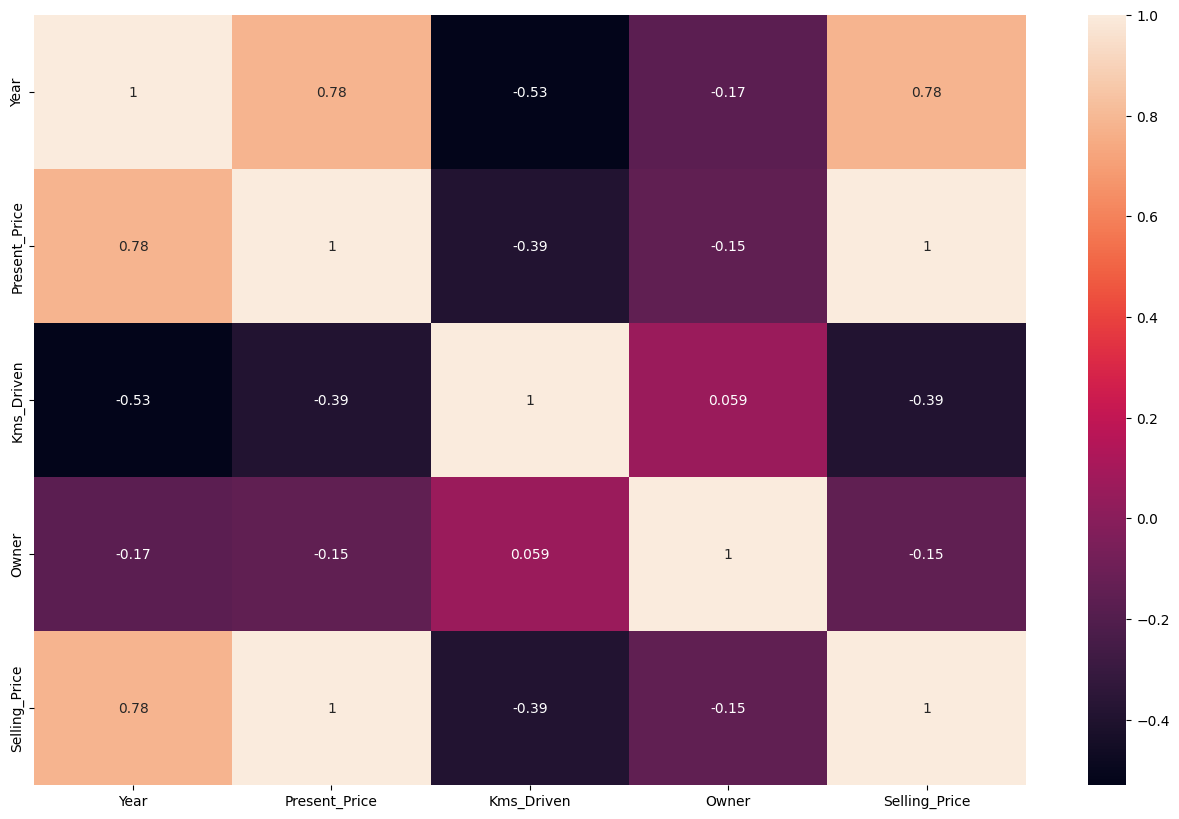

In [ ]:
plt.rcParams['figure.figsize']=[16,10]
sns.heatmap(df.corr(),annot=True)

In [ ]:
df1.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Selling_Price',
       'Car_Name_Activa 3g', 'Car_Name_Activa 4g', 'Car_Name_Bajaj  ct 100',
       'Car_Name_Bajaj Avenger 150', 'Car_Name_Bajaj Avenger 150 street',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object', length=106)

In [ ]:
df1.head()

,Year,Present_Price,Kms_Driven,Owner,Selling_Price,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2016,12417.55,33217,0,11717.50,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,2017,10633.13,12905,0,9931.75,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,2015,10881.40,62053,0,10180.25,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2016,11107.79,43897,0,10404.75,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2016,10316.40,4108,0,9614.00,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


Model training
I now separate by data to X and y variables

In [ ]:
x=df1[[ 'Year','Kms_Driven', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual', 'Owner']]
y=df1['Selling_Price']

In [ ]:
x.head()

,Year,Kms_Driven,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner
0,2016,33217,0,1,1,1,0
1,2017,12905,0,1,0,1,0
2,2015,62053,1,0,0,1,0
3,2016,43897,1,0,0,1,0
4,2016,4108,0,1,0,1,0


In [ ]:

from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
! pip install lazypredict

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier,LazyRegressor

In [ ]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=101)

In [ ]:
models = {'LogisticRegression': LogisticRegression(),
          'DecisionTreeClassifier': DecisionTreeClassifier(),
          'RandomForestClassifier':  RandomForestClassifier(n_estimators=100, random_state=42),
         'GradientBoostingClassifier': GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)}

In [ ]:
def train(model, x_train,y_train):
    model.fit(x_train, y_train)
    return model

In [ ]:
def score(model,x_test, y_test):
    predictions = model.predict(x_test)
    y_pred = predictions

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)


    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print(' Recall:',  recall)
    print()
    return [accuracy, precision, recall]

In [ ]:
scoring1 = pd.DataFrame()
scoring1['Metric'] = ['Accuracy', 'Precision', 'Recall']

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X is your feature matrix and y is your continuous label vector

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other parameters

# Train the model
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, predictions)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 142240.51279496233
R-squared (R2) Score: 0.9363338978338275


We can now see that how prediction is 0.93 % which means model is working fine

Model deployment

In [ ]:
import pickle
file = open('model.pkl','wb')
pickle.dump(model,file)

Now how model is ready for deployment